<a href="https://colab.research.google.com/github/golgo11g/git_golgo11g/blob/master/%E6%9D%B1%E4%BA%AC%E9%9B%BB%E5%8A%9B%E9%9C%80%E8%A6%81%E4%BA%88%E6%B8%ACcolabipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install pystan

In [ ]:
!pip3 install fbprophet

In [2]:
import pandas as pd
from fbprophet import Prophet

In [3]:
_df = pd.read_csv('https://www.tepco.co.jp/forecast/html/images/juyo-2017.csv',encoding = 'shift-jis')

In [4]:
_df = pd.read_csv('https://www.tepco.co.jp/forecast/html/images/juyo-2017.csv',encoding = 'shift-jis',skiprows=1)

In [5]:
_df

,DATE,TIME,実績(万kW)
0,2017/1/1,0:00,2783
1,2017/1/1,1:00,2634
2,2017/1/1,2:00,2520
3,2017/1/1,3:00,2438
4,2017/1/1,4:00,2389
...,...,...,...
8755,2017/12/31,19:00,3527
8756,2017/12/31,20:00,3443
8757,2017/12/31,21:00,3335
8758,2017/12/31,22:00,3200


In [6]:
_df.shape

(8760, 3)

In [7]:
years = [2017, 2018, 2019]
# year = years[2]
df = pd.DataFrame()
for year in years:
    _df = pd.read_csv(f'https://www.tepco.co.jp/forecast/html/images/juyo-{year}.csv',encoding = 'shift-jis',skiprows=1)
    df = pd.concat([df, _df], axis=0)

In [8]:
df

,DATE,TIME,実績(万kW)
0,2017/1/1,0:00,2783
1,2017/1/1,1:00,2634
2,2017/1/1,2:00,2520
3,2017/1/1,3:00,2438
4,2017/1/1,4:00,2389
...,...,...,...
8755,2019/12/31,19:00,3302
8756,2019/12/31,20:00,3263
8757,2019/12/31,21:00,3182
8758,2019/12/31,22:00,3077


In [9]:
df.head()

,DATE,TIME,実績(万kW)
0,2017/1/1,0:00,2783
1,2017/1/1,1:00,2634
2,2017/1/1,2:00,2520
3,2017/1/1,3:00,2438
4,2017/1/1,4:00,2389


In [10]:
df.tail()

,DATE,TIME,実績(万kW)
8755,2019/12/31,19:00,3302
8756,2019/12/31,20:00,3263
8757,2019/12/31,21:00,3182
8758,2019/12/31,22:00,3077
8759,2019/12/31,23:00,3029


In [11]:
df.shape

(26280, 3)

In [12]:
df = df.reset_index(drop=True)

In [13]:
df

,DATE,TIME,実績(万kW)
0,2017/1/1,0:00,2783
1,2017/1/1,1:00,2634
2,2017/1/1,2:00,2520
3,2017/1/1,3:00,2438
4,2017/1/1,4:00,2389
...,...,...,...
26275,2019/12/31,19:00,3302
26276,2019/12/31,20:00,3263
26277,2019/12/31,21:00,3182
26278,2019/12/31,22:00,3077


In [14]:
df['DATE'][0]

'2017/1/1'

In [15]:
df['TIME'][0]

'0:00'

In [16]:
date = df['DATE'][0]
time = df['TIME'][0]
str_datetime = f'{date} {time}'
str_datetime

'2017/1/1 0:00'

In [17]:
from datetime import datetime as dt

In [18]:
datetime = dt.strptime(str_datetime, '%Y/%m/%d %H:%M')
datetime

datetime.datetime(2017, 1, 1, 0, 0)

In [19]:
datetimes = []

for index, datum in df.iterrows():
    date = datum['DATE']
    time = datum['TIME']
    str_datetime = f'{date} {time}'
    datetime = dt.strptime(str_datetime, '%Y/%m/%d %H:%M')
    datetimes.append(datetime)

In [20]:
datetimes[:3]

[datetime.datetime(2017, 1, 1, 0, 0),
 datetime.datetime(2017, 1, 1, 1, 0),
 datetime.datetime(2017, 1, 1, 2, 0)]

In [21]:
df['ds'] = datetimes

In [22]:
df.head()

,DATE,TIME,実績(万kW),ds
0,2017/1/1,0:00,2783,2017-01-01 00:00:00
1,2017/1/1,1:00,2634,2017-01-01 01:00:00
2,2017/1/1,2:00,2520,2017-01-01 02:00:00
3,2017/1/1,3:00,2438,2017-01-01 03:00:00
4,2017/1/1,4:00,2389,2017-01-01 04:00:00


In [23]:
df = df.rename(columns={'実績(万kW)': 'y'})

前処理完了、予測モデルの構築

In [24]:
model = Prophet()


In [25]:
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


In [26]:
df

,DATE,TIME,y,ds
0,2017/1/1,0:00,2783,2017-01-01 00:00:00
1,2017/1/1,1:00,2634,2017-01-01 01:00:00
2,2017/1/1,2:00,2520,2017-01-01 02:00:00
3,2017/1/1,3:00,2438,2017-01-01 03:00:00
4,2017/1/1,4:00,2389,2017-01-01 04:00:00
...,...,...,...,...
26275,2019/12/31,19:00,3302,2019-12-31 19:00:00
26276,2019/12/31,20:00,3263,2019-12-31 20:00:00
26277,2019/12/31,21:00,3182,2019-12-31 21:00:00
26278,2019/12/31,22:00,3077,2019-12-31 22:00:00


In [27]:
model.make_future_dataframe(24*366,freq='H')

,ds
0,2017-01-01 00:00:00
1,2017-01-01 01:00:00
2,2017-01-01 02:00:00
3,2017-01-01 03:00:00
4,2017-01-01 04:00:00
...,...
35059,2020-12-31 19:00:00
35060,2020-12-31 20:00:00
35061,2020-12-31 21:00:00
35062,2020-12-31 22:00:00


In [28]:
future = model.make_future_dataframe(24*366,freq='H')

In [29]:
future.tail()

,ds
35059,2020-12-31 19:00:00
35060,2020-12-31 20:00:00
35061,2020-12-31 21:00:00
35062,2020-12-31 22:00:00
35063,2020-12-31 23:00:00


In [30]:
model.predict(future)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-01 00:00:00,3038.643373,1964.402843,2764.654238,3038.643373,3038.643373,-667.956428,-667.956428,-667.956428,-488.417802,-488.417802,-488.417802,-332.713462,-332.713462,-332.713462,153.174836,153.174836,153.174836,0.0,0.0,0.0,2370.686945
1,2017-01-01 01:00:00,3038.827962,1856.331288,2627.502424,3038.827962,3038.827962,-806.326413,-806.326413,-806.326413,-617.309962,-617.309962,-617.309962,-342.159100,-342.159100,-342.159100,153.142649,153.142649,153.142649,0.0,0.0,0.0,2232.501548
2,2017-01-01 02:00:00,3039.012550,1735.551369,2522.302694,3039.012550,3039.012550,-891.592152,-891.592152,-891.592152,-694.375983,-694.375983,-694.375983,-350.332970,-350.332970,-350.332970,153.116802,153.116802,153.116802,0.0,0.0,0.0,2147.420398
3,2017-01-01 03:00:00,3039.197138,1707.519020,2472.686366,3039.197138,3039.197138,-932.036423,-932.036423,-932.036423,-727.960893,-727.960893,-727.960893,-357.172839,-357.172839,-357.172839,153.097309,153.097309,153.097309,0.0,0.0,0.0,2107.160716
4,2017-01-01 04:00:00,3039.381726,1754.799440,2478.966361,3039.381726,3039.381726,-917.684314,-917.684314,-917.684314,-708.142983,-708.142983,-708.142983,-362.625516,-362.625516,-362.625516,153.084185,153.084185,153.084185,0.0,0.0,0.0,2121.697412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2020-12-31 19:00:00,2762.320726,1012.805395,5988.164825,247.084400,5274.384991,670.635253,670.635253,670.635253,396.227734,396.227734,396.227734,120.977144,120.977144,120.977144,153.430374,153.430374,153.430374,0.0,0.0,0.0,3432.955979
35060,2020-12-31 20:00:00,2762.278350,844.296483,5932.137818,246.553797,5274.675795,566.922395,566.922395,566.922395,292.169710,292.169710,292.169710,121.385983,121.385983,121.385983,153.366703,153.366703,153.366703,0.0,0.0,0.0,3329.200745
35061,2020-12-31 21:00:00,2762.235974,678.255665,5692.611083,246.023193,5274.966600,401.360681,401.360681,401.360681,126.182033,126.182033,126.182033,121.869350,121.869350,121.869350,153.309298,153.309298,153.309298,0.0,0.0,0.0,3163.596655
35062,2020-12-31 22:00:00,2762.193598,521.947494,5411.588504,245.498456,5275.257404,190.194424,190.194424,190.194424,-85.475310,-85.475310,-85.475310,122.411558,122.411558,122.411558,153.258175,153.258175,153.258175,0.0,0.0,0.0,2952.388022


In [31]:
forcast = model.predict(future)

In [32]:
import matplotlib.pyplot as plt

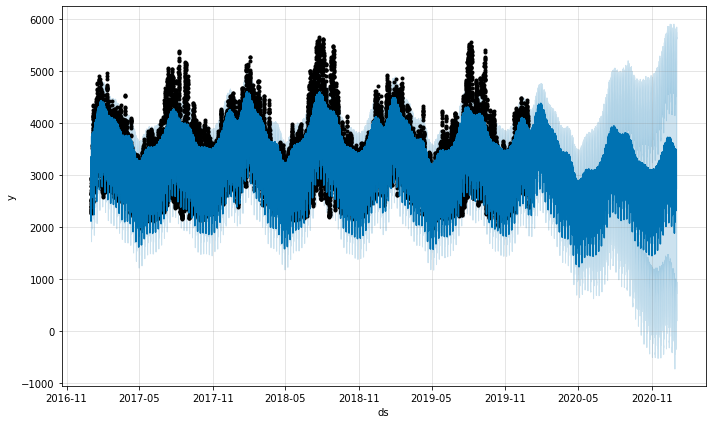

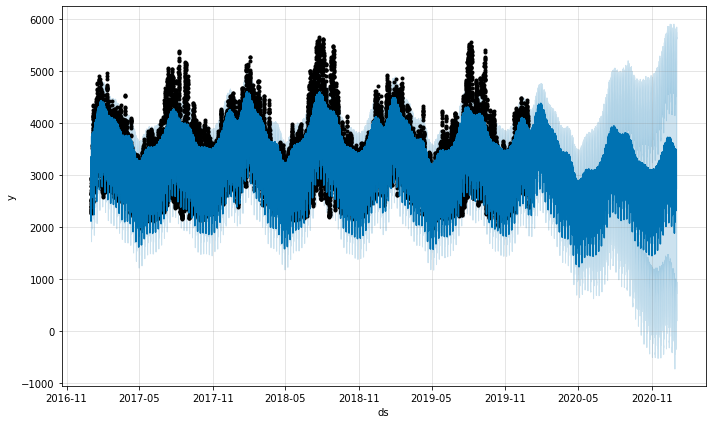

In [33]:
model.plot(forcast)

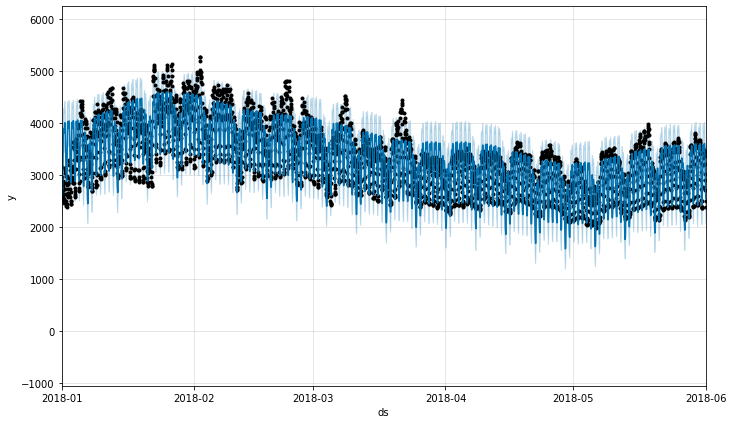

In [34]:
model.plot(forcast)
plt.xlim(dt(2018, 1, 1), dt(2018, 6,1))
plt.show()

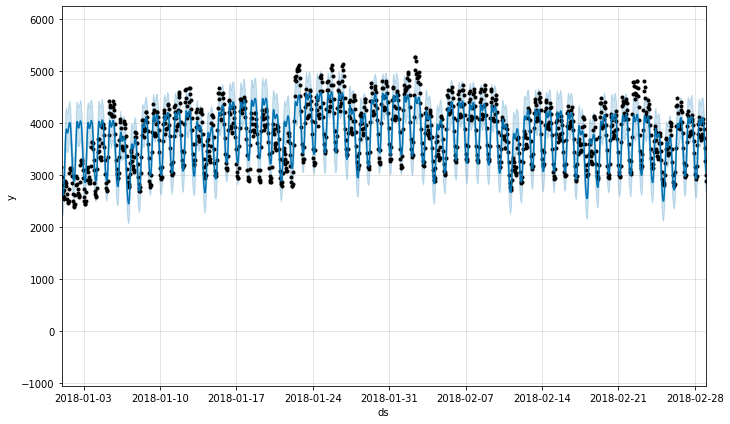

In [35]:
model.plot(forcast)
plt.xlim(dt(2018, 1, 1), dt(2018, 3,1))
plt.show()

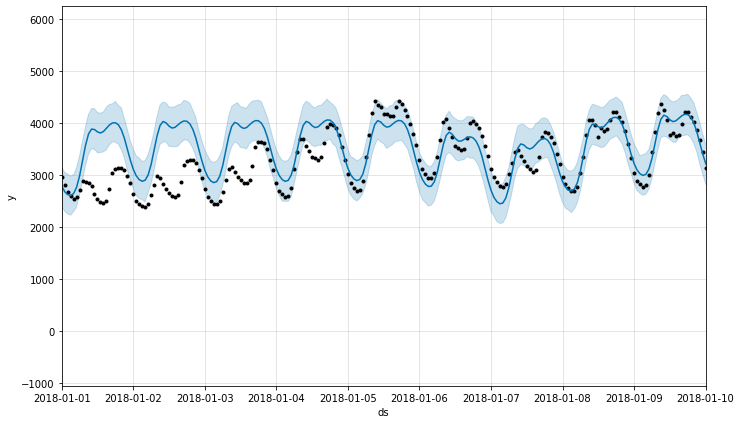

In [36]:
model.plot(forcast)
plt.xlim(dt(2018, 1, 1), dt(2018, 1,10))
plt.show()

予測結果の集約（実測値と予測値をまとめる）

In [37]:
df_2020 = pd.read_csv('https://www.tepco.co.jp/forecast/html/images/juyo-2020.csv',encoding = 'shift-jis',skiprows=1)

In [38]:
df_2020.head()

,DATE,TIME,実績(万kW)
0,2020/1/1,0:00,2857
1,2020/1/1,1:00,2703
2,2020/1/1,2:00,2602
3,2020/1/1,3:00,2520
4,2020/1/1,4:00,2464


In [39]:
forcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-01 00:00:00,3038.643373,1985.534852,2740.784213,3038.643373,3038.643373,-667.956428,-667.956428,-667.956428,-488.417802,-488.417802,-488.417802,-332.713462,-332.713462,-332.713462,153.174836,153.174836,153.174836,0.0,0.0,0.0,2370.686945
1,2017-01-01 01:00:00,3038.827962,1860.889924,2598.176051,3038.827962,3038.827962,-806.326413,-806.326413,-806.326413,-617.309962,-617.309962,-617.309962,-342.159100,-342.159100,-342.159100,153.142649,153.142649,153.142649,0.0,0.0,0.0,2232.501548
2,2017-01-01 02:00:00,3039.012550,1755.231100,2519.187972,3039.012550,3039.012550,-891.592152,-891.592152,-891.592152,-694.375983,-694.375983,-694.375983,-350.332970,-350.332970,-350.332970,153.116802,153.116802,153.116802,0.0,0.0,0.0,2147.420398
3,2017-01-01 03:00:00,3039.197138,1721.273685,2497.745104,3039.197138,3039.197138,-932.036423,-932.036423,-932.036423,-727.960893,-727.960893,-727.960893,-357.172839,-357.172839,-357.172839,153.097309,153.097309,153.097309,0.0,0.0,0.0,2107.160716
4,2017-01-01 04:00:00,3039.381726,1732.841572,2529.139337,3039.381726,3039.381726,-917.684314,-917.684314,-917.684314,-708.142983,-708.142983,-708.142983,-362.625516,-362.625516,-362.625516,153.084185,153.084185,153.084185,0.0,0.0,0.0,2121.697412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2020-12-31 19:00:00,2762.320726,898.186913,5747.323117,254.276677,5029.063372,670.635253,670.635253,670.635253,396.227734,396.227734,396.227734,120.977144,120.977144,120.977144,153.430374,153.430374,153.430374,0.0,0.0,0.0,3432.955979
35060,2020-12-31 20:00:00,2762.278350,752.956454,5590.143755,253.859012,5029.446182,566.922395,566.922395,566.922395,292.169710,292.169710,292.169710,121.385983,121.385983,121.385983,153.366703,153.366703,153.366703,0.0,0.0,0.0,3329.200745
35061,2020-12-31 21:00:00,2762.235974,590.701523,5485.616870,253.441347,5029.828992,401.360681,401.360681,401.360681,126.182033,126.182033,126.182033,121.869350,121.869350,121.869350,153.309298,153.309298,153.309298,0.0,0.0,0.0,3163.596655
35062,2020-12-31 22:00:00,2762.193598,422.533214,5191.994793,253.023682,5030.211802,190.194424,190.194424,190.194424,-85.475310,-85.475310,-85.475310,122.411558,122.411558,122.411558,153.258175,153.258175,153.258175,0.0,0.0,0.0,2952.388022


In [40]:
forcast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
35059,2020-12-31 19:00:00,2762.320726,898.186913,5747.323117,254.276677,5029.063372,670.635253,670.635253,670.635253,396.227734,396.227734,396.227734,120.977144,120.977144,120.977144,153.430374,153.430374,153.430374,0.0,0.0,0.0,3432.955979
35060,2020-12-31 20:00:00,2762.278350,752.956454,5590.143755,253.859012,5029.446182,566.922395,566.922395,566.922395,292.169710,292.169710,292.169710,121.385983,121.385983,121.385983,153.366703,153.366703,153.366703,0.0,0.0,0.0,3329.200745
35061,2020-12-31 21:00:00,2762.235974,590.701523,5485.616870,253.441347,5029.828992,401.360681,401.360681,401.360681,126.182033,126.182033,126.182033,121.869350,121.869350,121.869350,153.309298,153.309298,153.309298,0.0,0.0,0.0,3163.596655
35062,2020-12-31 22:00:00,2762.193598,422.533214,5191.994793,253.023682,5030.211802,190.194424,190.194424,190.194424,-85.475310,-85.475310,-85.475310,122.411558,122.411558,122.411558,153.258175,153.258175,153.258175,0.0,0.0,0.0,2952.388022
35063,2020-12-31 23:00:00,2762.151222,199.038034,4998.629410,252.606017,5030.594612,-27.942535,-27.942535,-27.942535,-304.148420,-304.148420,-304.148420,122.992535,122.992535,122.992535,153.213350,153.213350,153.213350,0.0,0.0,0.0,2734.208687


In [41]:
forcast['ds']

0       2017-01-01 00:00:00
1       2017-01-01 01:00:00
2       2017-01-01 02:00:00
3       2017-01-01 03:00:00
4       2017-01-01 04:00:00
                ...        
35059   2020-12-31 19:00:00
35060   2020-12-31 20:00:00
35061   2020-12-31 21:00:00
35062   2020-12-31 22:00:00
35063   2020-12-31 23:00:00
Name: ds, Length: 35064, dtype: datetime64[ns]

In [42]:
forcast['ds'] >= dt(2020, 1, 1)

0        False
1        False
2        False
3        False
4        False
         ...  
35059     True
35060     True
35061     True
35062     True
35063     True
Name: ds, Length: 35064, dtype: bool

In [43]:
forcast[forcast['ds'] >= dt(2020, 1, 1)]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
26280,2020-01-01 00:00:00,3134.340011,2531.865847,3284.957733,3134.340011,3134.340011,-224.856836,-224.856836,-224.856836,-488.417802,-488.417802,-488.417802,108.739814,108.739814,108.739814,154.821152,154.821152,154.821152,0.0,0.0,0.0,2909.483175
26281,2020-01-01 01:00:00,3134.297635,2396.979807,3167.336996,3134.297635,3134.297635,-354.546087,-354.546087,-354.546087,-617.309962,-617.309962,-617.309962,108.086395,108.086395,108.086395,154.677480,154.677480,154.677480,0.0,0.0,0.0,2779.751548
26282,2020-01-01 02:00:00,3134.255259,2321.418760,3078.545800,3134.255259,3134.255259,-432.164816,-432.164816,-432.164816,-694.375983,-694.375983,-694.375983,107.671307,107.671307,107.671307,154.539860,154.539860,154.539860,0.0,0.0,0.0,2702.090443
26283,2020-01-01 03:00:00,3134.212883,2271.252090,3045.113438,3134.212883,3134.212883,-466.064530,-466.064530,-466.064530,-727.960893,-727.960893,-727.960893,107.488055,107.488055,107.488055,154.408308,154.408308,154.408308,0.0,0.0,0.0,2668.148353
26284,2020-01-01 04:00:00,3134.170507,2270.578629,3112.575107,3134.170507,3134.170507,-446.333967,-446.333967,-446.333967,-708.142983,-708.142983,-708.142983,107.526173,107.526173,107.526173,154.282843,154.282843,154.282843,0.0,0.0,0.0,2687.836539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2020-12-31 19:00:00,2762.320726,898.186913,5747.323117,254.276677,5029.063372,670.635253,670.635253,670.635253,396.227734,396.227734,396.227734,120.977144,120.977144,120.977144,153.430374,153.430374,153.430374,0.0,0.0,0.0,3432.955979
35060,2020-12-31 20:00:00,2762.278350,752.956454,5590.143755,253.859012,5029.446182,566.922395,566.922395,566.922395,292.169710,292.169710,292.169710,121.385983,121.385983,121.385983,153.366703,153.366703,153.366703,0.0,0.0,0.0,3329.200745
35061,2020-12-31 21:00:00,2762.235974,590.701523,5485.616870,253.441347,5029.828992,401.360681,401.360681,401.360681,126.182033,126.182033,126.182033,121.869350,121.869350,121.869350,153.309298,153.309298,153.309298,0.0,0.0,0.0,3163.596655
35062,2020-12-31 22:00:00,2762.193598,422.533214,5191.994793,253.023682,5030.211802,190.194424,190.194424,190.194424,-85.475310,-85.475310,-85.475310,122.411558,122.411558,122.411558,153.258175,153.258175,153.258175,0.0,0.0,0.0,2952.388022


In [44]:
forcast_2020 = forcast[forcast['ds'] >= dt(2020, 1, 1)].reset_index(drop=True)

In [45]:
forcast_2020.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-01 00:00:00,3134.340011,2531.865847,3284.957733,3134.340011,3134.340011,-224.856836,-224.856836,-224.856836,-488.417802,-488.417802,-488.417802,108.739814,108.739814,108.739814,154.821152,154.821152,154.821152,0.0,0.0,0.0,2909.483175
1,2020-01-01 01:00:00,3134.297635,2396.979807,3167.336996,3134.297635,3134.297635,-354.546087,-354.546087,-354.546087,-617.309962,-617.309962,-617.309962,108.086395,108.086395,108.086395,154.677480,154.677480,154.677480,0.0,0.0,0.0,2779.751548
2,2020-01-01 02:00:00,3134.255259,2321.418760,3078.545800,3134.255259,3134.255259,-432.164816,-432.164816,-432.164816,-694.375983,-694.375983,-694.375983,107.671307,107.671307,107.671307,154.539860,154.539860,154.539860,0.0,0.0,0.0,2702.090443
3,2020-01-01 03:00:00,3134.212883,2271.252090,3045.113438,3134.212883,3134.212883,-466.064530,-466.064530,-466.064530,-727.960893,-727.960893,-727.960893,107.488055,107.488055,107.488055,154.408308,154.408308,154.408308,0.0,0.0,0.0,2668.148353
4,2020-01-01 04:00:00,3134.170507,2270.578629,3112.575107,3134.170507,3134.170507,-446.333967,-446.333967,-446.333967,-708.142983,-708.142983,-708.142983,107.526173,107.526173,107.526173,154.282843,154.282843,154.282843,0.0,0.0,0.0,2687.836539


In [46]:
forcast_2020.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
8779,2020-12-31 19:00:00,2762.320726,898.186913,5747.323117,254.276677,5029.063372,670.635253,670.635253,670.635253,396.227734,396.227734,396.227734,120.977144,120.977144,120.977144,153.430374,153.430374,153.430374,0.0,0.0,0.0,3432.955979
8780,2020-12-31 20:00:00,2762.278350,752.956454,5590.143755,253.859012,5029.446182,566.922395,566.922395,566.922395,292.169710,292.169710,292.169710,121.385983,121.385983,121.385983,153.366703,153.366703,153.366703,0.0,0.0,0.0,3329.200745
8781,2020-12-31 21:00:00,2762.235974,590.701523,5485.616870,253.441347,5029.828992,401.360681,401.360681,401.360681,126.182033,126.182033,126.182033,121.869350,121.869350,121.869350,153.309298,153.309298,153.309298,0.0,0.0,0.0,3163.596655
8782,2020-12-31 22:00:00,2762.193598,422.533214,5191.994793,253.023682,5030.211802,190.194424,190.194424,190.194424,-85.475310,-85.475310,-85.475310,122.411558,122.411558,122.411558,153.258175,153.258175,153.258175,0.0,0.0,0.0,2952.388022
8783,2020-12-31 23:00:00,2762.151222,199.038034,4998.629410,252.606017,5030.594612,-27.942535,-27.942535,-27.942535,-304.148420,-304.148420,-304.148420,122.992535,122.992535,122.992535,153.213350,153.213350,153.213350,0.0,0.0,0.0,2734.208687


In [47]:
df_2020 = df_2020.rename(columns={'実績(万kW)': 'y'})
df_2020.head()

,DATE,TIME,y
0,2020/1/1,0:00,2857
1,2020/1/1,1:00,2703
2,2020/1/1,2:00,2602
3,2020/1/1,3:00,2520
4,2020/1/1,4:00,2464


In [48]:
df_2020.head()

,DATE,TIME,y
0,2020/1/1,0:00,2857
1,2020/1/1,1:00,2703
2,2020/1/1,2:00,2602
3,2020/1/1,3:00,2520
4,2020/1/1,4:00,2464


In [49]:
forcast_2020['yhat']

0       2909.483175
1       2779.751548
2       2702.090443
3       2668.148353
4       2687.836539
           ...     
8779    3432.955979
8780    3329.200745
8781    3163.596655
8782    2952.388022
8783    2734.208687
Name: yhat, Length: 8784, dtype: float64

In [50]:
results = pd.DataFrame()

In [54]:
# 実測値
results['t'] = df_2020['y']
# 予測値
results['y'] = forcast_2020['yhat']
results['diff'] = results['t'] -results['y']
results.head()

,t,y,diff
0,2857,2909.483175,-52.483175
1,2703,2779.751548,-76.751548
2,2602,2702.090443,-100.090443
3,2520,2668.148353,-148.148353
4,2464,2687.836539,-223.836539
